<a href="https://colab.research.google.com/github/CollinsRutto/Social-Media-Analysis-and-scrapping/blob/main/Scatter%20Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

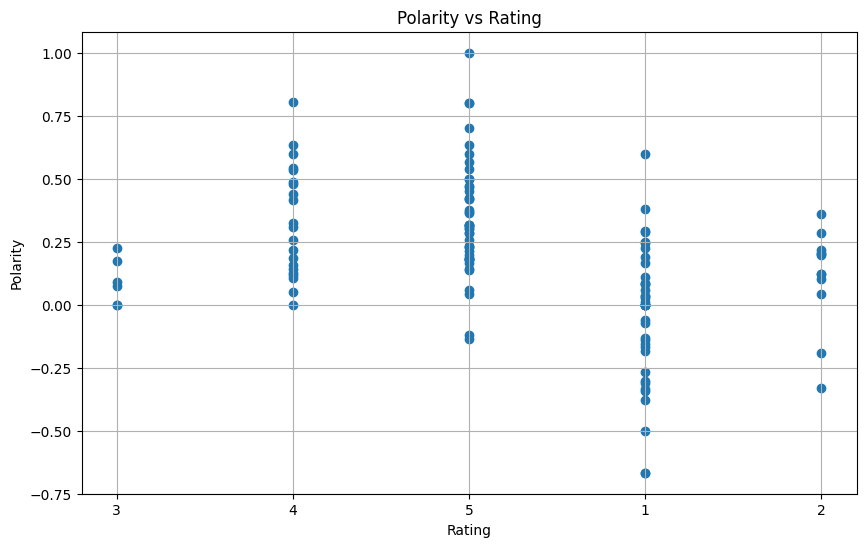

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import requests
from bs4 import BeautifulSoup
from time import sleep

def soup2list(src, list_, attr=None):
    if attr:
        for val in src:
            list_.append(val[attr])
    else:
        for val in src:
            list_.append(val.get_text(strip=True))

def extract_trustpilot_data(company, from_page, to_page):
    users = []
    ratings = []
    reviews = []

    for i in range(from_page, to_page + 1):
        result = requests.get(f"https://www.trustpilot.com/review/{company}?page={i}")
        soup = BeautifulSoup(result.content, 'html.parser')

        soup2list(soup.find_all('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), users)
        soup2list(soup.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), ratings, attr='data-service-review-rating')
        soup2list(soup.find_all('div', {'class': 'styles_reviewContent__0Q2Tg'}), reviews)

        sleep(1)

    df = pd.DataFrame({
        'User': users,
        'Rating': ratings,
        'Review': reviews
    })

    return df

# Define parameters
company = 'goodreads.com'
from_page = 1
to_page = 7

# Extract data from Trustpilot reviews
trustpilot_data = extract_trustpilot_data(company, from_page, to_page)

# Perform sentiment analysis
trustpilot_data['Polarity'] = trustpilot_data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize polarity vs rating
plt.figure(figsize=(10, 6))
plt.scatter(trustpilot_data['Rating'], trustpilot_data['Polarity'])
plt.title('Polarity vs Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')
plt.grid()
plt.show()
